## Causal Analysis on California Housing Prices
#### Analysis on Features Driving Californaian House Values (Linear Regression) <br> The dataset is downloaded from Kaggle: <br>
"kaggle.com/datasets/camnugent/california-housing-prices/download?datasetVersionNumber=1" <br> It was collected in the 1990 U.S. census.<br>
#### Dataset Attributes:
=> MedInc - median income in block group <br>
=> HouseAge - median house age in block group <br>
=> AveRooms - average number of rooms per hosehold <br>
=> AveBedrms - average number of bedrooms per household <br>
=> Population - block group population <br>
=> AveOccup - average number of household members <br>
=> Latitude - block group latitude <br>
=> Longitude - block group longitude

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


##### How To Get Dataset

Past the following url in your browser to download the dataset zip (archive):<br>
 ###### kaggle.com/datasets/camnugent/california-housing-prices/download?datasetVersionNumber=1 <br><br>
 Once downloaded, unzip the folder and copy the "housing.csv" file to the project folder.

In [140]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [61]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


##### Unique values in ocean proximity

In [63]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

##### Missing Information

In [64]:
missing_values = data.isnull().sum()
missing_values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [65]:
# Calculating the percentage of missing data in each column
percentage_missing = (missing_values / len(data) * 100)

print(f"Missing values in each column: \n {missing_values}")
print(f"\nPercentage of missing data:\n {percentage_missing}")

Missing values in each column: 
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of missing data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


##### Dealing with Missing Values

In [66]:
# Dropping any missing value in the data
data_cleaned_1 = data.dropna()

# Verify missing values removed.
print(data_cleaned_1.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


##### Data Exploration and Visualisation

In [67]:
data_cleaned_1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


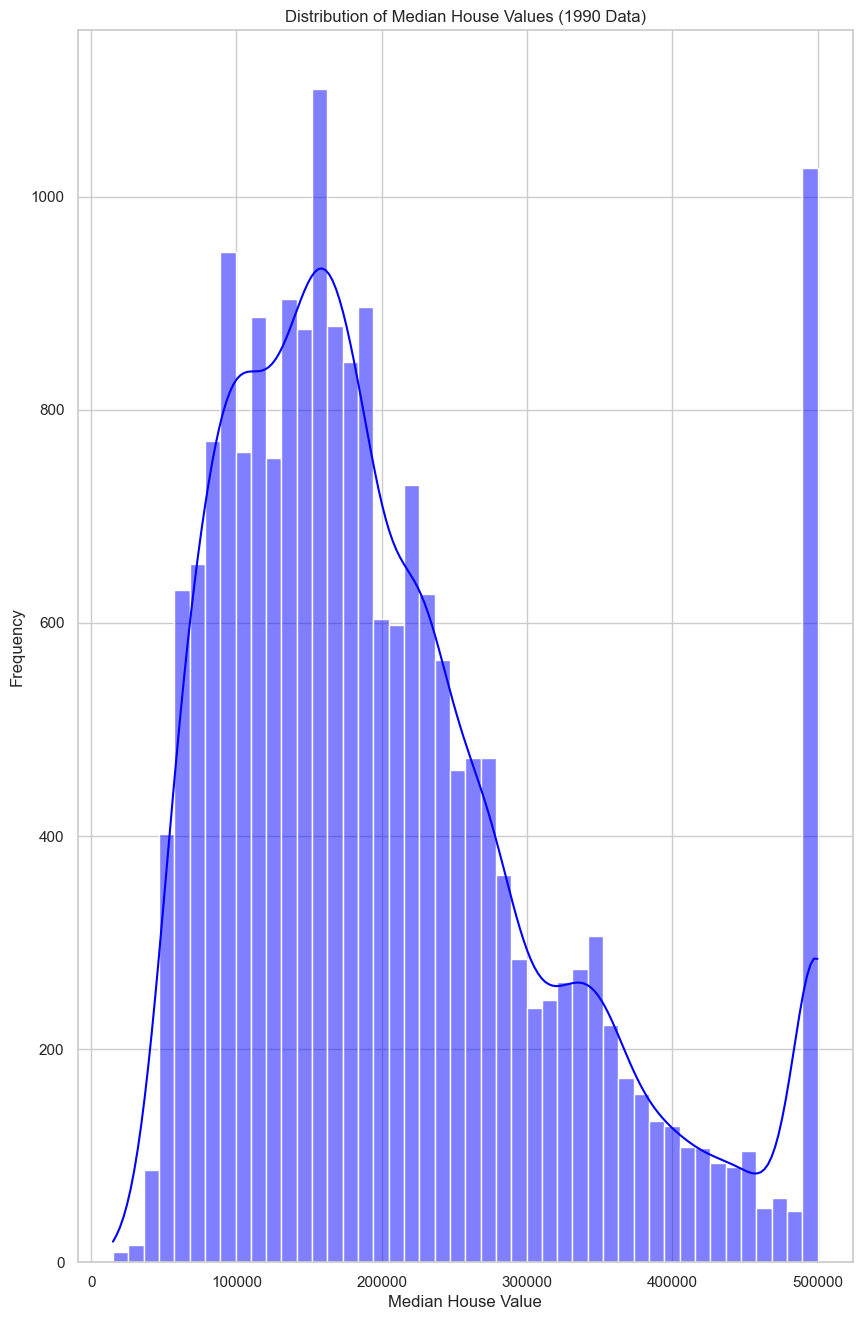

In [84]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (10, 16))
sns.histplot(data_cleaned_1['median_house_value'], color='blue', kde=True)
plt.title('Distribution of Median House Values (1990 Data)')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

##### Using Interquartile range to remove Outliers in Median House Values`

In [80]:
# Defining the moving Outliers in the Median House Value using Quantiles
Q1 = data_cleaned_1['median_house_value'].quantile(0.25)
Q3 = data_cleaned_1['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for Outliers
lo_bound = Q1 - 1.5 * IQR
up_bound = Q3 + 1.5 * IQR


data_cleaned_2 = data_cleaned_1[(data_cleaned_1['median_house_value'] >= lo_bound) & (data_cleaned_1['median_house_value'] <= up_bound)]

print(f"Data count before Outlier removal: {data_cleaned_1.shape}")
print(f"Data count after Outlier removal: {data_cleaned_2.shape}")

Data count before Outlier removal: (20433, 10)
Data count after Outlier removal: (19369, 10)


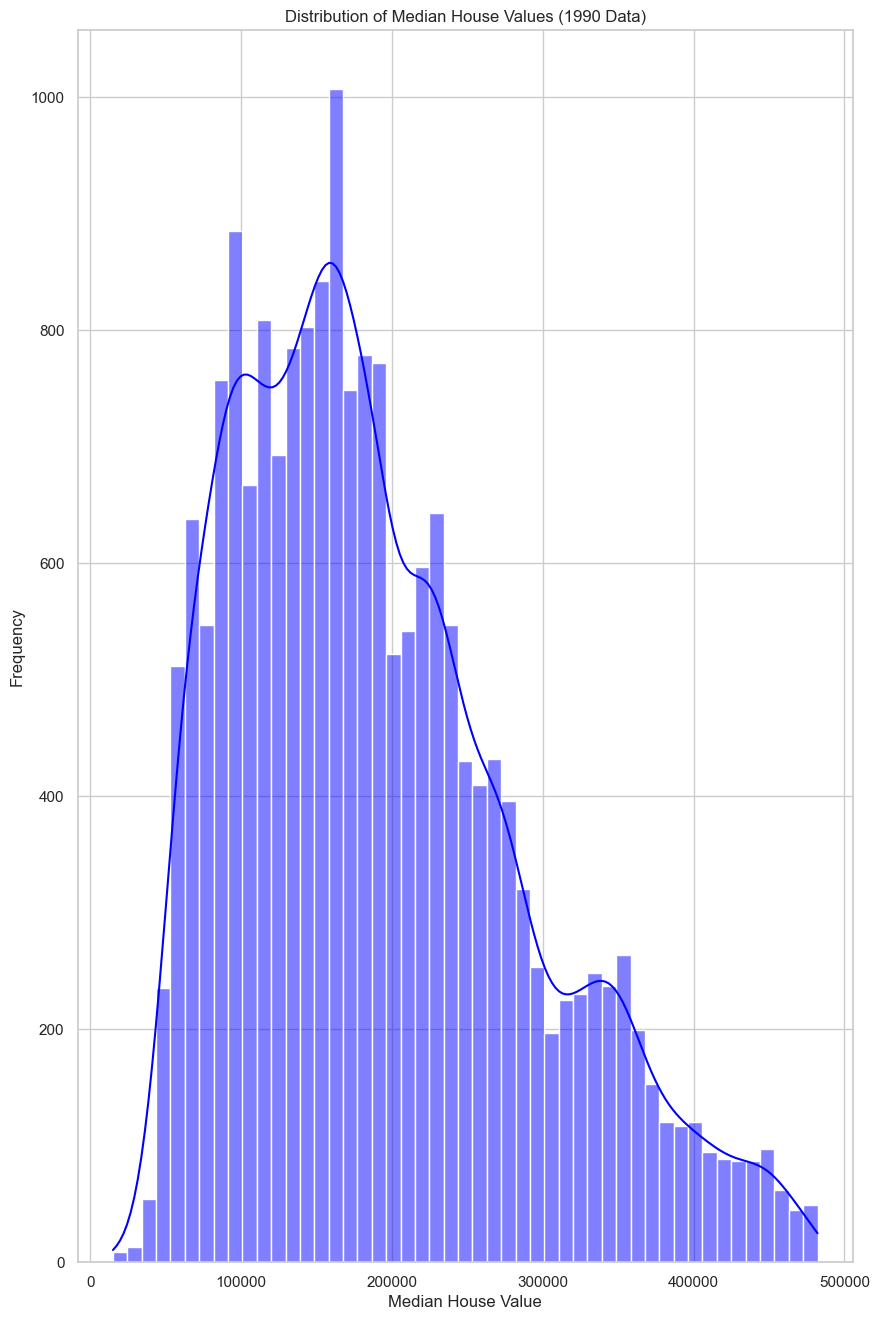

In [83]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (10, 16))
sns.histplot(data_cleaned_2['median_house_value'], color='blue', kde=True)
plt.title('Distribution of Median House Values (1990 Data)')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

##### Boxplot for Outlier Detection 

###### Outliers in Median Income

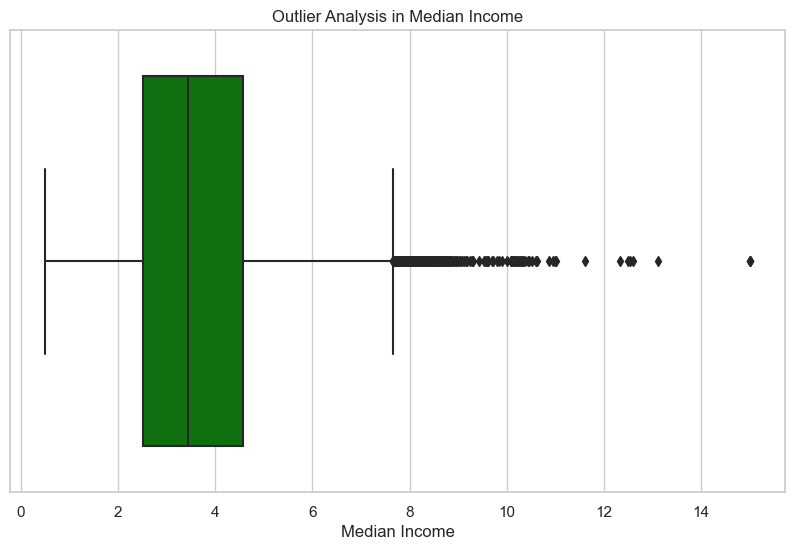

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned_2['median_income'], color='green')
plt.title('Outlier Analysis in Median Income')
plt.xlabel('Median Income')
plt.show()

In [117]:
# Defining the moving Outliers in the Median House Value using Quantiles
Q1 = data_cleaned_2['median_income'].quantile(0.25)
Q3 = data_cleaned_2['median_income'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for Outliers
lo_bound = Q1 - 1.5 * IQR
up_bound = Q3 + 1.5 * IQR

data_cleaned_3 = data_cleaned_2[(data_cleaned_2['median_income'] >= lo_bound) & (data_cleaned_2['median_income'] <= up_bound)]

print(f"Data count before Outlier removal: {data_cleaned_2.shape}")
print(f"Data count after Outlier removal: {data_cleaned_3.shape}")

Data count before Outlier removal: (19369, 10)
Data count after Outlier removal: (19026, 10)


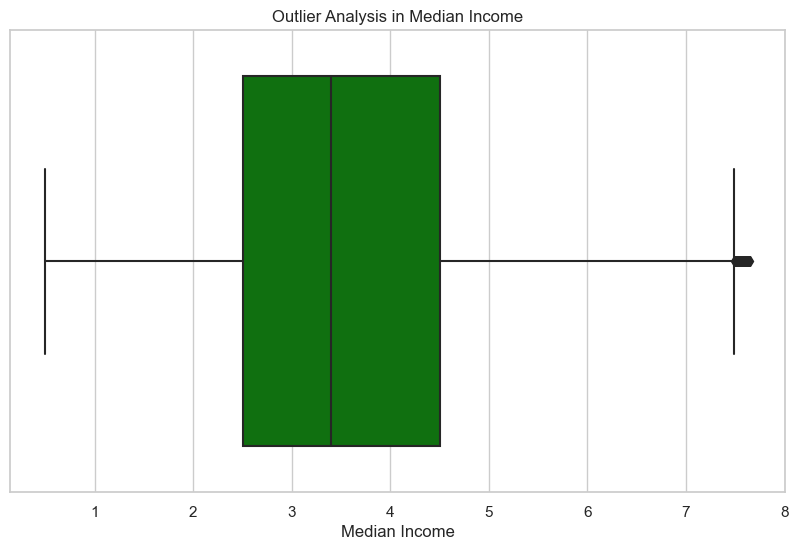

In [118]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned_3['median_income'], color='green')
plt.title('Outlier Analysis in Median Income')
plt.xlabel('Median Income')
plt.show()

##### Correlation HeatMap<br>
Detecting Multi-Collinearity

In [119]:
corr_data = data_cleaned_3.drop(columns='ocean_proximity', axis=1)

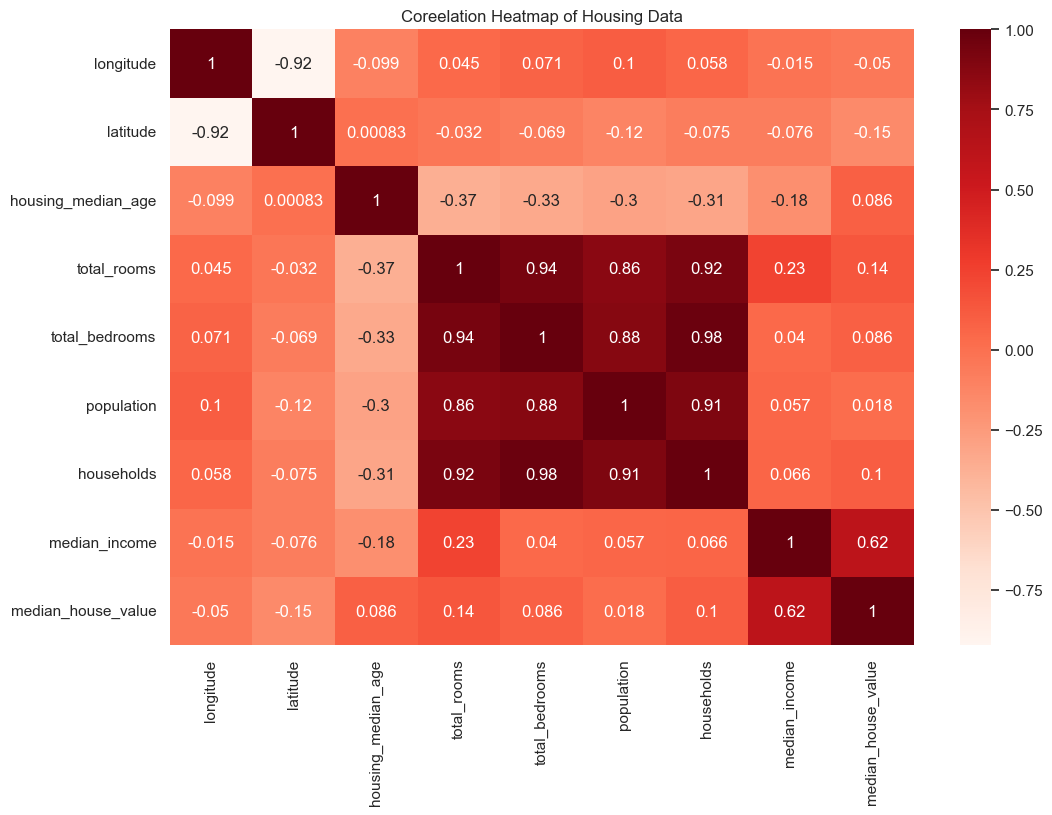

In [108]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_data.corr(), annot=True, cmap='Reds')
plt.title('Coreelation Heatmap of Housing Data')
plt.show()

###### Strong correlation between Total bedrooms and other independent vars (Drop)

In [143]:
data = data_cleaned_3.drop("total_bedrooms", axis=1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

##### Convert Categorical Data to Dummy Variables

In [144]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity', dtype=int)
data = pd.concat([data.drop("ocean_proximity", axis=1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


##### Drop one of the Dummies in order to avoid a perfect Multi-collinearity

In [ ]:
data = data.drop("ocean_proximity_ISLAND", axis=1)
test_predictions.to_csv("test-predict.csv", index=False)

In [146]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,1,0
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,0,0,1,0


##### Splitting Data into Train, Test

In [183]:
X = data.drop(columns="median_house_value", axis=1)
y = data["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [184]:
data.to_csv("clean-data.csv", index=False)

##### Training

In [185]:
# Adding a constant to the predictors becase statsmodels' OLS doesn't include it be default
X_train_const = sm.add_constant(X_train)

# Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     1988.
Date:                Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:41:26   Log-Likelihood:            -1.8885e+05
No. Observations:               15220   AIC:                         3.777e+05
Df Residuals:                   15208   BIC:                         3.778e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### Prdiction / Testing

In [171]:
X_test_const = sm.add_constant(X_test)

test_predictions = model_fitted.predict(X_test_const)
test_predictions.head(10)


2248     166889.526066
20302    269188.605689
1022      48578.828476
337      165061.685961
9097     204882.085938
6110     209281.674329
16823    270492.548570
5975     146623.983980
12366     80971.375804
15730    221101.080805
dtype: float64

#### Checking OLS Assumptions

##### Assumption 1: Linearity

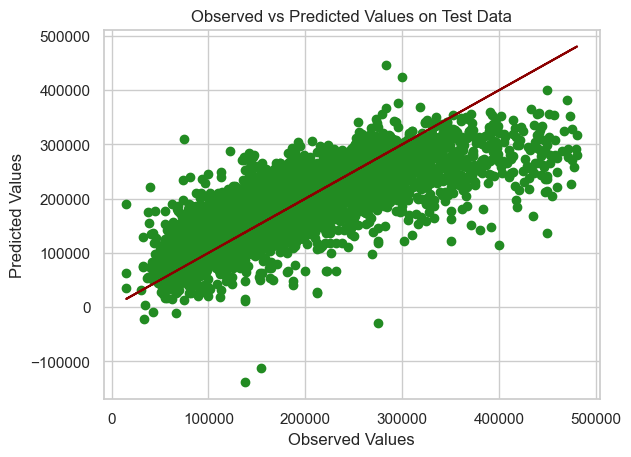

In [172]:
# Scatter plot for ovserved vs predicted values on test data
plt.scatter(y_test, test_predictions, color="forestgreen")
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Observed vs Predicted Values on Test Data")
plt.plot(y_test, y_test, color='darkred')  # Line for perfect prediction
plt.show()



##### Assumption 2: Random Sample

In [177]:
# Calculating the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)
print(f"the mean of the rsiduals is {np.round(mean_residuals, 2)}")

the mean of the rsiduals is -0.0


The residuals are the differences between the observed values and the preicted values from the model. If the model is well-fitted, the residuals should be randomly scattered around zero without any systematic patterns.

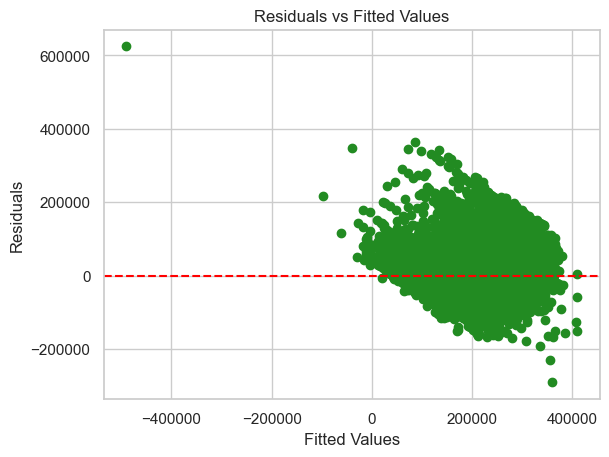

In [187]:
# Plotting the residuals
plt.title("Residuals vs Fitted Values")
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color="forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

The scatter plot shows no discernible patterns. the residuals are thus randomly distributed around the horizontal line at zero, with no clear shap or trend. If there's a pattern, or if the residuals show  systematic deviation from zero, it could suggest issues such as model misspecification, non-linnearity, or omitted variable bias.

##### Assumption 3: Exogeneity

In [181]:
residuals = model_fitted.resid

# Checking for correlation between residuals and each predictor
for column in X_train.columns:
    corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
    print(f'Correlation between residuals and {column}: {np.round(corr_coefficient)}')




Correlation between residuals and longitude: 0.0
Correlation between residuals and latitude: -0.0
Correlation between residuals and housing_median_age: -0.0
Correlation between residuals and total_rooms: -0.0
Correlation between residuals and population: -0.0
Correlation between residuals and households: -0.0
Correlation between residuals and median_income: -0.0
Correlation between residuals and ocean_proximity_<1H OCEAN: 0.0
Correlation between residuals and ocean_proximity_INLAND: 0.0
Correlation between residuals and ocean_proximity_NEAR BAY: -0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN: 0.0


##### Assumption 4: Homoskedasticity

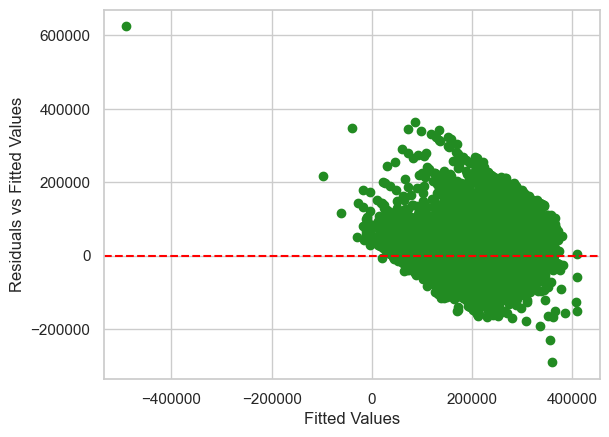

In [182]:
# Plotting Residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color='forestgreen')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals vs Fitted Values')
plt.show()

Random Scatter: If plot shows a random scatter of residuals around the horizontal line at zero, it supports the homoscedasticity assumption.
Pattern or Shape: If residuals display a pattern (such as curve) or from a funnel shape where the spread increases with fitted values, theis would sugest heteroscedasticity, meaning variance of residuals changes with the level of the independent variables.

#### Train/Test/Evaluation with Sklearn

##### Scaling `

In [191]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [195]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_predict = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_predict)
rmse = sqrt(mse)

print("MSE on Test Set: ", mse)
print("RMSE on Test Set: ", rmse)

MSE on Test Set:  3408707561.360778
RMSE on Test Set:  58384.137925987896
